In [ ]:
pip install yfinance


In [ ]:
import yfinance as yf
from datetime import datetime

In [ ]:
end=datetime.now()
start=datetime(end.year-20,end.month,end.day)

In [ ]:
stock="GOOG"
google_data=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2004-12-13,4.230138,4.245337,4.313333,4.220431,4.288177,193466452
2004-12-14,4.434634,4.450568,4.453806,4.224167,4.259036,445198482
2004-12-15,4.461685,4.477716,4.500381,4.400008,4.433134,460559845
2004-12-16,4.379539,4.395275,4.495400,4.382324,4.407231,344197318
2004-12-17,4.469130,4.485188,4.495649,4.397268,4.402498,296555412


In [ ]:
google_data.shape

(5034, 6)

In [ ]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,47.844605,47.954830,48.438610,47.456893,47.936315,1.100505e+08
std,45.702545,45.795316,46.268713,45.319602,45.771404,1.426092e+08
min,4.223259,4.233631,4.313333,4.196022,4.240356,1.584340e+05
25%,13.253652,13.286200,13.402514,13.142987,13.296661,2.663600e+07
50%,27.797232,27.865496,28.122789,27.660000,27.904388,5.160069e+07
75%,63.005768,63.160500,63.488548,62.451000,63.044998,1.346548e+08
max,192.406723,192.660004,193.309998,190.619995,191.750000,1.650833e+09


In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2004-12-02 00:00:00+00:00 to 2024-11-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5033 non-null   float64
 1   (Close, GOOG)      5033 non-null   float64
 2   (High, GOOG)       5033 non-null   float64
 3   (Low, GOOG)        5033 non-null   float64
 4   (Open, GOOG)       5033 non-null   float64
 5   (Volume, GOOG)     5033 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [ ]:
google_data.isna().sum()

,,0
Price,Ticker,
Adj Close,GOOG,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'closing price of Google data')

<Figure size 1500x500 with 0 Axes>

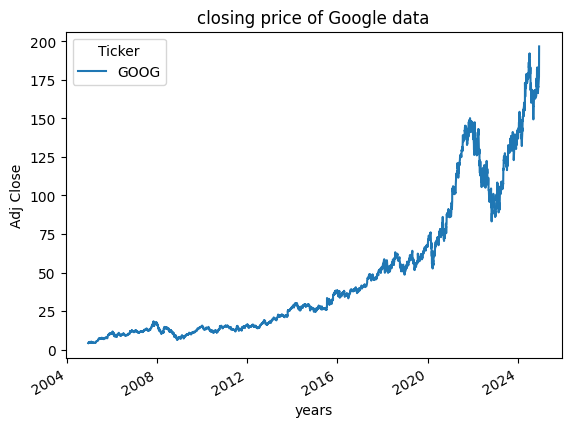

In [ ]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("closing price of Google data")

In [ ]:
def plot_graph(figsize,values,column_name):
  plt.figure()
  values.plot(figsize=figsize)
  plt.xlabel("years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Google Data")

In [ ]:
google_data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

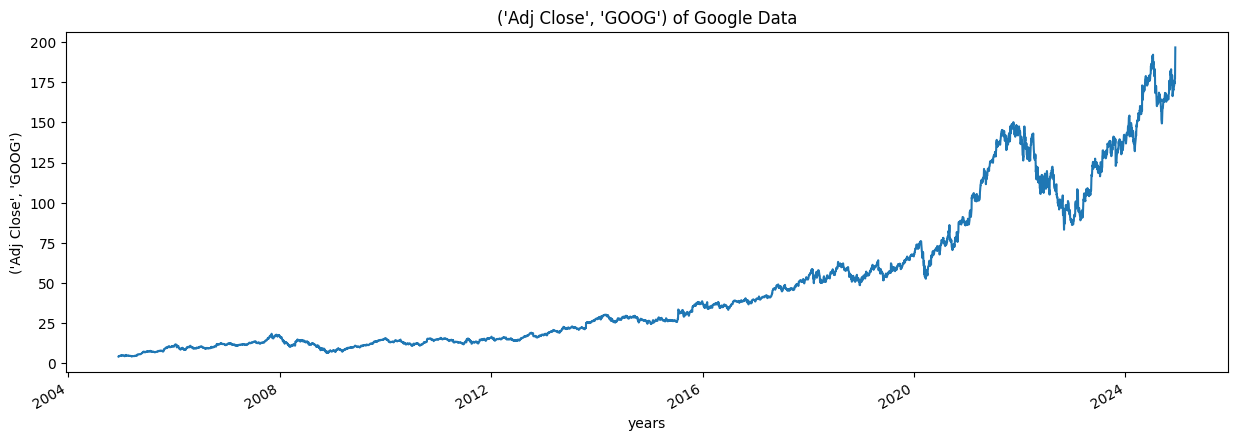

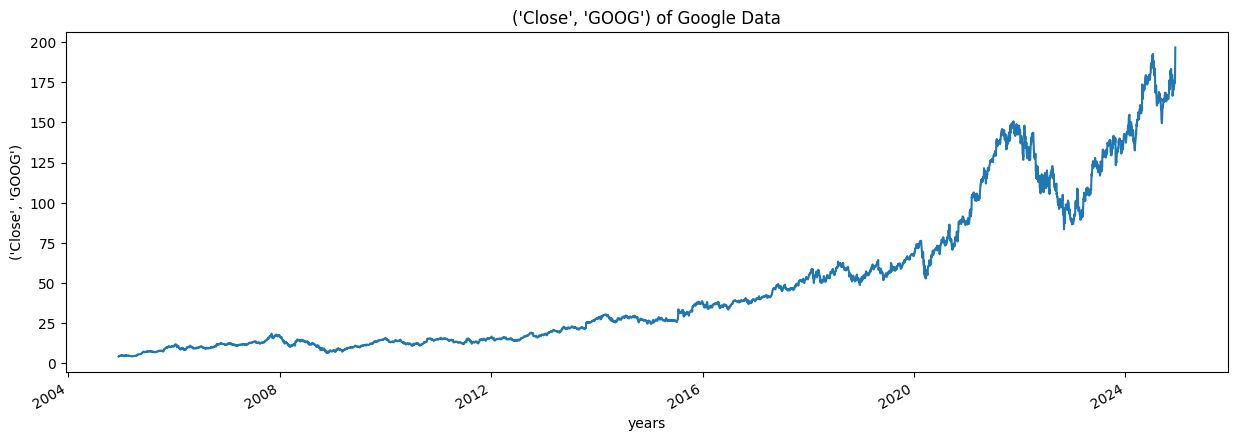

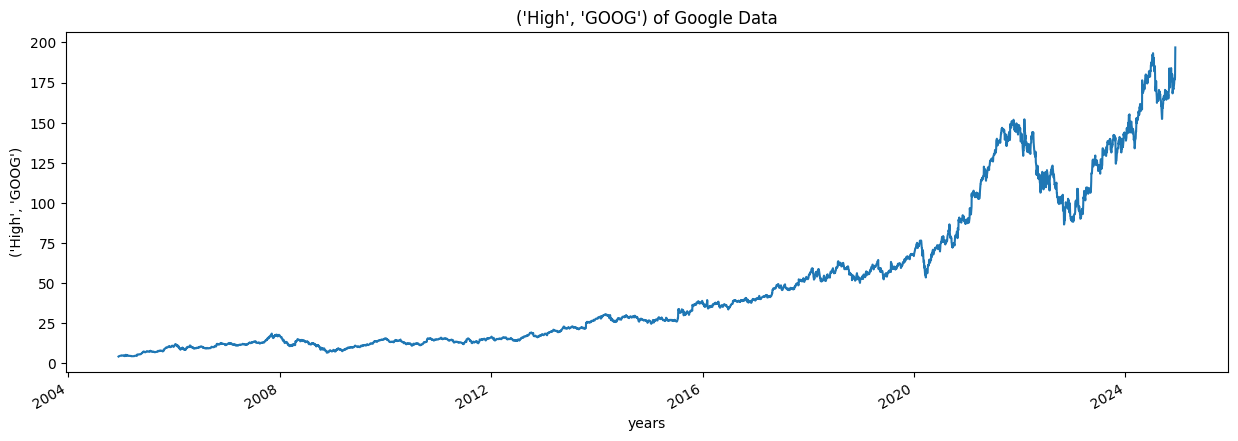

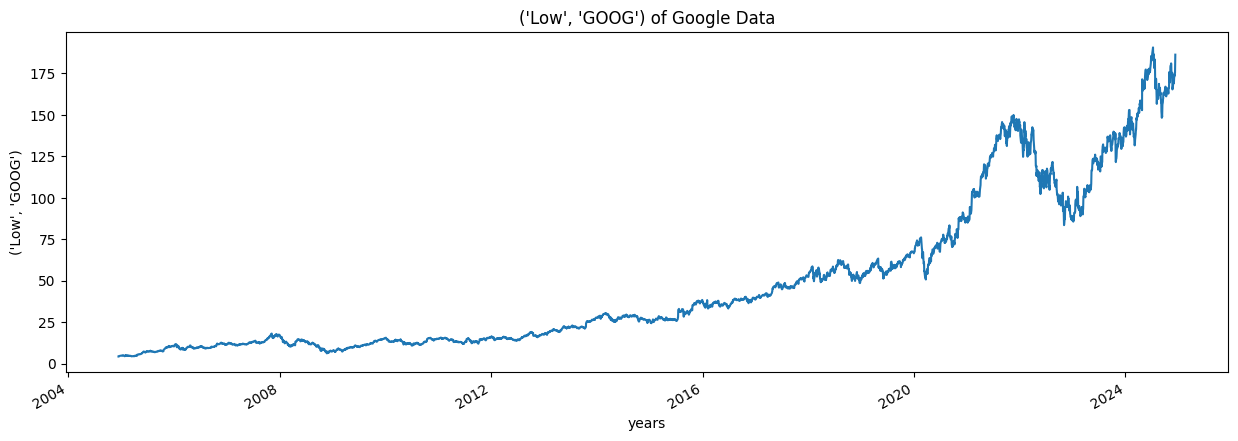

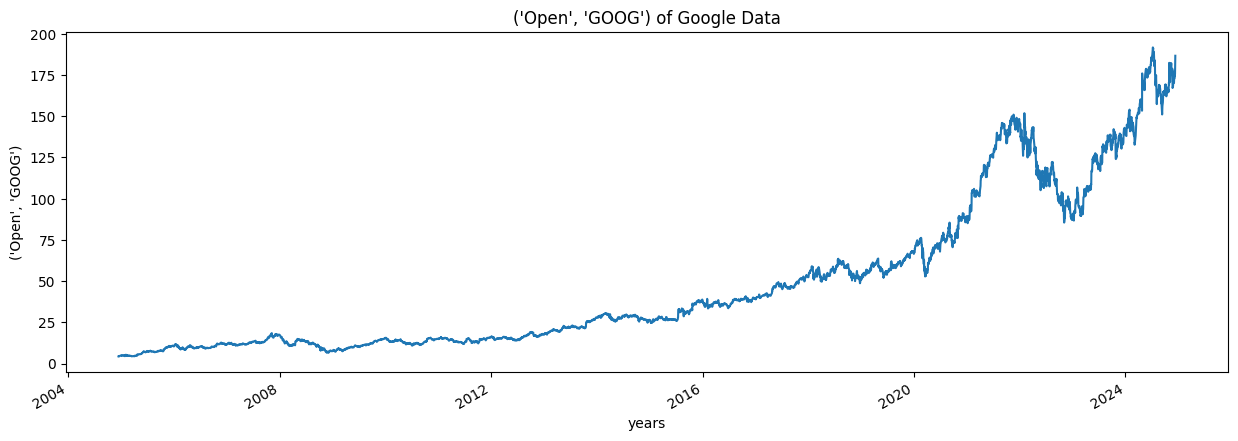

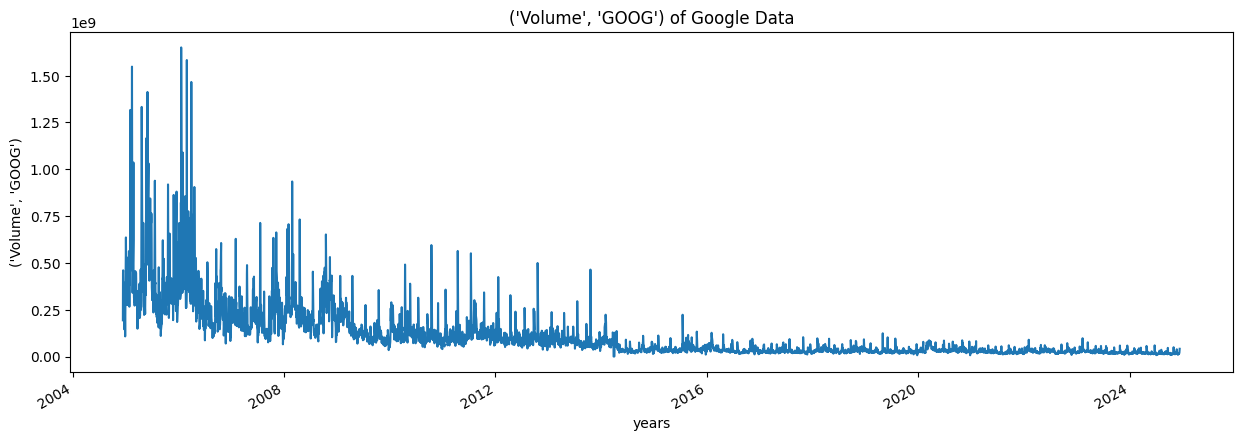

In [ ]:
for column in google_data.columns:
  plot_graph((15,5),google_data[column],column)

In [ ]:
for i in range(2004,2024):
  print(i,list(google_data.index.year).count(i))

2004 21
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250


In [ ]:
google_data['MA_for_250_days']=google_data['Adj Close'].rolling(250).mean()

In [ ]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-12-01,NaN
2005-12-02,NaN
2005-12-05,NaN
2005-12-06,NaN
2005-12-07,6.535939


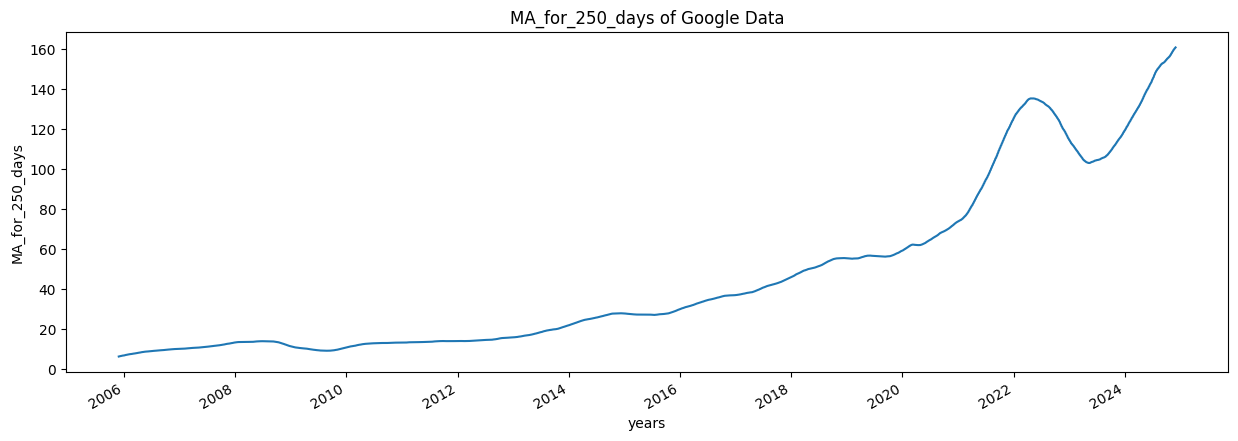

In [ ]:
plot_graph((15,5),google_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

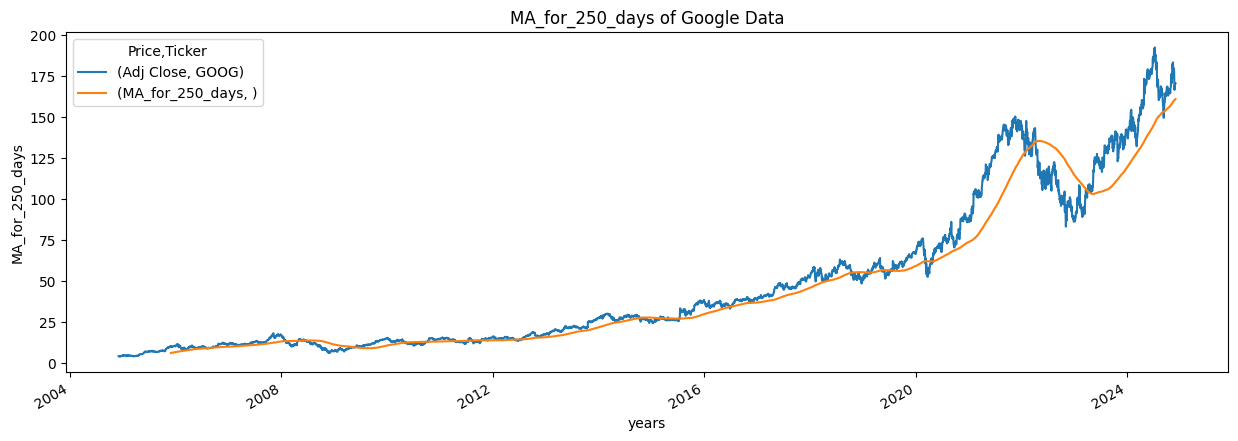

In [ ]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

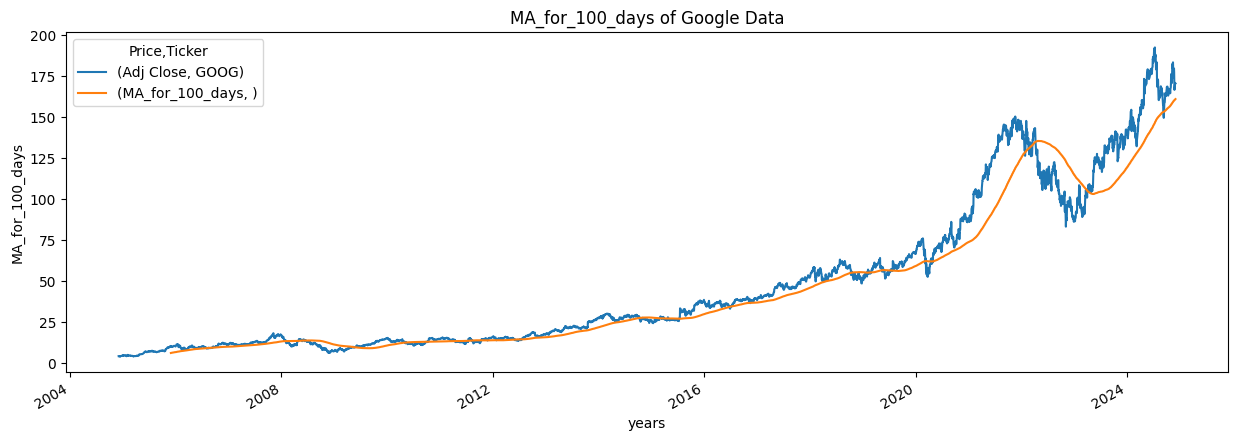

In [ ]:
google_data['MA_for_100_days']=google_data['Adj Close'].rolling(250).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']],'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

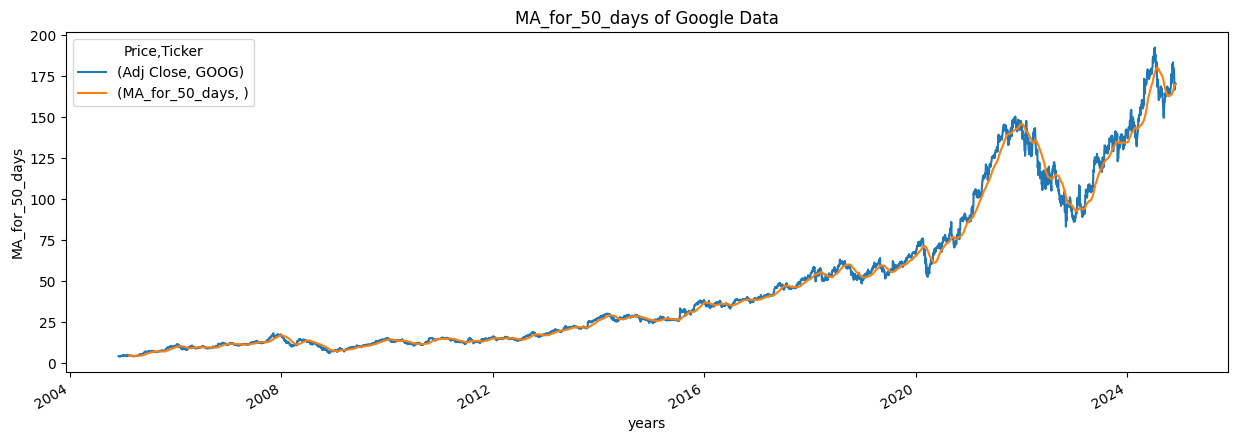

In [ ]:
google_data['MA_for_50_days']=google_data['Adj Close'].rolling(50).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_50_days']],'MA_for_50_days')

<Figure size 640x480 with 0 Axes>

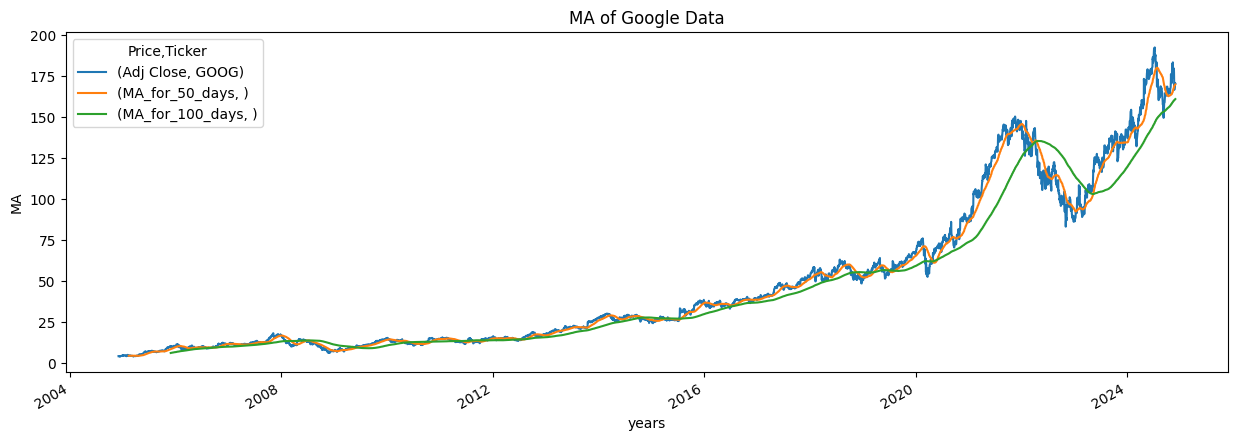

In [ ]:
plot_graph((15,5),google_data[['Adj Close','MA_for_50_days','MA_for_100_days']],'MA')

In [ ]:
google_data['percentage_change_cp']=google_data['Adj Close'].pct_change()
google_data['percentage_change_cp']

,percentage_change_cp
Date,
2004-12-02 00:00:00+00:00,NaN
2004-12-03 00:00:00+00:00,0.005574
2004-12-06 00:00:00+00:00,-0.022783
2004-12-07 00:00:00+00:00,-0.027568
2004-12-08 00:00:00+00:00,-0.008458
...,...
2024-11-22 00:00:00+00:00,-0.015776
2024-11-25 00:00:00+00:00,0.017170
2024-11-26 00:00:00+00:00,0.007024


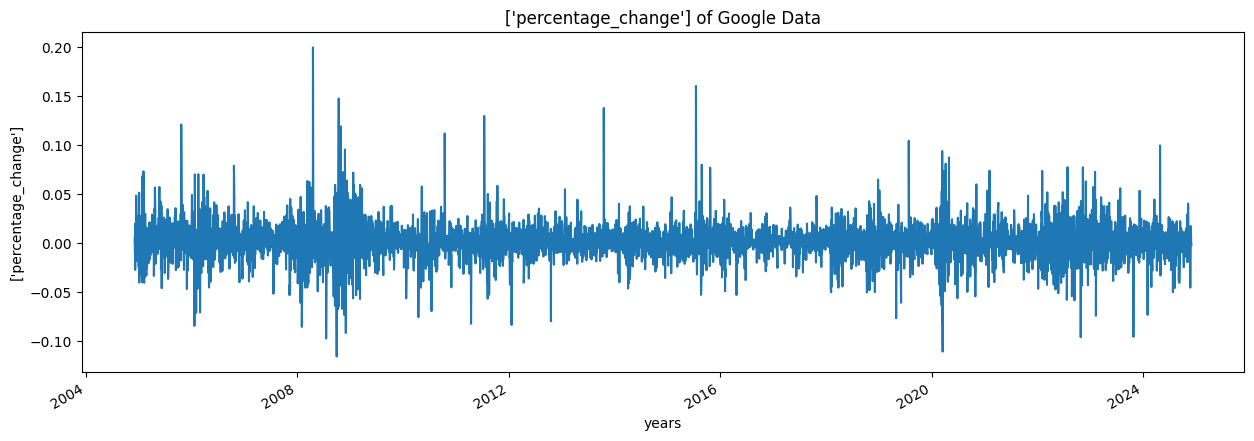

In [ ]:
plot_graph((15,5),google_data['percentage_change_cp'],['percentage_change'])

In [ ]:
Adj_close_price=google_data[['Adj Close']]

In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([196.71000671]), array([4.23013783]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.        ],
       [0.00106243],
       [0.00120297],
       ...,
       [0.89811921],
       [0.94711131],
       [1.        ]])

In [ ]:
len(scaled_data)

5034

In [ ]:
x_data=[]
y_data=[]

for i in range(100,len(scaled_data)):
  x_data.append(scaled_data[i-100:i])
  y_data.append(scaled_data[i])
import numpy as np
x_data,y_data=np.array(x_data),np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[1.24371427e-03],
        [1.37574034e-03],
        [8.33099102e-04],
        [1.91443377e-04],
        [0.00000000e+00],
        [4.55500587e-04],
        [2.20489417e-04],
        [6.20525574e-05],
        [1.14997282e-03],
        [1.29388033e-03],
        [8.56867038e-04],
        [1.33348764e-03],
        [1.98571224e-03],
        [1.81803933e-03],
        [2.15471291e-03],
        [2.36595361e-03],
        [2.89539072e-03],
        [3.00761947e-03],
        [3.02610170e-03],
        [3.64663741e-03],
        [3.01157995e-03],
        [4.32130472e-03],
        [3.23734494e-03],
        [3.10663902e-03],
        [2.45177664e-03],
        [3.15152951e-03],
        [3.31128399e-03],
        [3.11059950e-03],
        [3.35353163e-03],
        [3.34693083e-03],
        [3.95954812e-03],
        [4.47841889e-03],
        [3.60702756e-03],
        [3.16076809e-03],
        [2.41612980e-03],
        [1.41799051e-03],
        [9.42687532e-04],
        [2.54287523e-03],
        [2.3

In [ ]:
int(len(x_data)*0.8)

3947

In [ ]:
len(x_data)-3948

986

In [ ]:
splitting_len=int(len(x_data)*0.8)
x_train=x_data[:splitting_len]
y_train=y_data[:splitting_len]

x_test=x_data[splitting_len:]
y_test=y_data[splitting_len:]


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3946, 100, 1)
(3946, 1)
(987, 100, 1)
(987, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3947/3947 ━━━━━━━━━━━━━━━━━━━━ 212s 54ms/step - loss: 5.9442e-05
Epoch 2/2
3947/3947 ━━━━━━━━━━━━━━━━━━━━ 210s 53ms/step - loss: 2.9774e-05


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions=model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


In [ ]:
predictions

array([[0.43336648],
       [0.4210499 ],
       [0.4137372 ],
       [0.41764075],
       [0.41697454],
       [0.41604573],
       [0.4293541 ],
       [0.45356396],
       [0.45280087],
       [0.4493215 ],
       [0.4476102 ],
       [0.4533678 ],
       [0.43417567],
       [0.44147116],
       [0.43950063],
       [0.45574796],
       [0.46314788],
       [0.49526903],
       [0.49190667],
       [0.4936022 ],
       [0.49178213],
       [0.49039924],
       [0.49539477],
       [0.4977505 ],
       [0.5002421 ],
       [0.50485665],
       [0.5065504 ],
       [0.5032903 ],
       [0.49909452],
       [0.49106544],
       [0.4938707 ],
       [0.5023143 ],
       [0.48689824],
       [0.48577964],
       [0.49913204],
       [0.49909076],
       [0.4841598 ],
       [0.48805022],
       [0.50565827],
       [0.48548338],
       [0.48807985],
       [0.49159068],
       [0.50707436],
       [0.4937978 ],
       [0.49096924],
       [0.49898353],
       [0.50034845],
       [0.485

In [ ]:
inv_predictions=scaler.inverse_transform(predictions)

In [ ]:
y_test

array([[0.43531617],
       [0.43009541],
       [0.4321273 ],
       [0.42844662],
       [0.42741391],
       [0.44156453],
       [0.46642326],
       [0.4675492 ],
       [0.47008575],
       [0.46965874],
       [0.47427637],
       [0.45189989],
       [0.46026551],
       [0.45318113],
       [0.47016344],
       [0.47693461],
       [0.5138345 ],
       [0.51184141],
       [0.5210638 ],
       [0.51974633],
       [0.51731327],
       [0.52038568],
       [0.52051771],
       [0.52264533],
       [0.52725004],
       [0.52890918],
       [0.52603349],
       [0.52187656],
       [0.51249115],
       [0.51403895],
       [0.5203313 ],
       [0.50381493],
       [0.5052385 ],
       [0.51679557],
       [0.51532795],
       [0.5026113 ],
       [0.5084041 ],
       [0.523792  ],
       [0.50195387],
       [0.50933851],
       [0.50994163],
       [0.52540453],
       [0.51172496],
       [0.5129079 ],
       [0.51964541],
       [0.5192727 ],
       [0.50507286],
       [0.506

In [ ]:
inv_y_test=scaler.inverse_transform(y_test)
inv_y_test

array([[ 88.01973724],
       [ 87.0148468 ],
       [ 87.40594482],
       [ 86.69748688],
       [ 86.49871063],
       [ 89.22241974],
       [ 94.00722504],
       [ 94.22394562],
       [ 94.71218109],
       [ 94.62998962],
       [ 95.5187912 ],
       [ 91.2117691 ],
       [ 92.82198334],
       [ 91.45838165],
       [ 94.7271347 ],
       [ 96.03044891],
       [103.13293457],
       [102.74930573],
       [104.52442932],
       [104.27084351],
       [103.80252838],
       [104.39390564],
       [104.41931915],
       [104.82884216],
       [105.71515656],
       [106.03450775],
       [105.48099518],
       [104.68087006],
       [102.87436676],
       [103.17228699],
       [104.38343811],
       [101.20436859],
       [101.4783783 ],
       [103.70288086],
       [103.4203949 ],
       [100.9726944 ],
       [102.08769226],
       [105.04955292],
       [100.84615326],
       [102.26754761],
       [102.38363647],
       [105.35993195],
       [102.72689056],
       [102

In [ ]:
rmse=np.sqrt(np.mean((inv_predictions-inv_y_test)**2))

In [ ]:
rmse

8.038581244037427

In [ ]:
import pandas as pd

In [ ]:
plotting_data=pd.DataFrame(
    {
        'Original_test_data':inv_y_test.reshape(-1),
        'Predictions':inv_predictions.reshape(-1)

    },
    index=google_data.index[splitting_len+100:]
)

plotting_data.head(10)

,Original_test_data,Predictions
Date,,
2021-01-11,88.019737,87.644463
2021-01-12,87.014847,85.273766
2021-01-13,87.405945,83.866219
2021-01-14,86.697487,84.617577
2021-01-15,86.498711,84.489342
2021-01-19,89.222420,84.310562
2021-01-20,94.007225,86.872162
2021-01-21,94.223946,91.532066
2021-01-22,94.712181,91.385193


<Figure size 640x480 with 0 Axes>

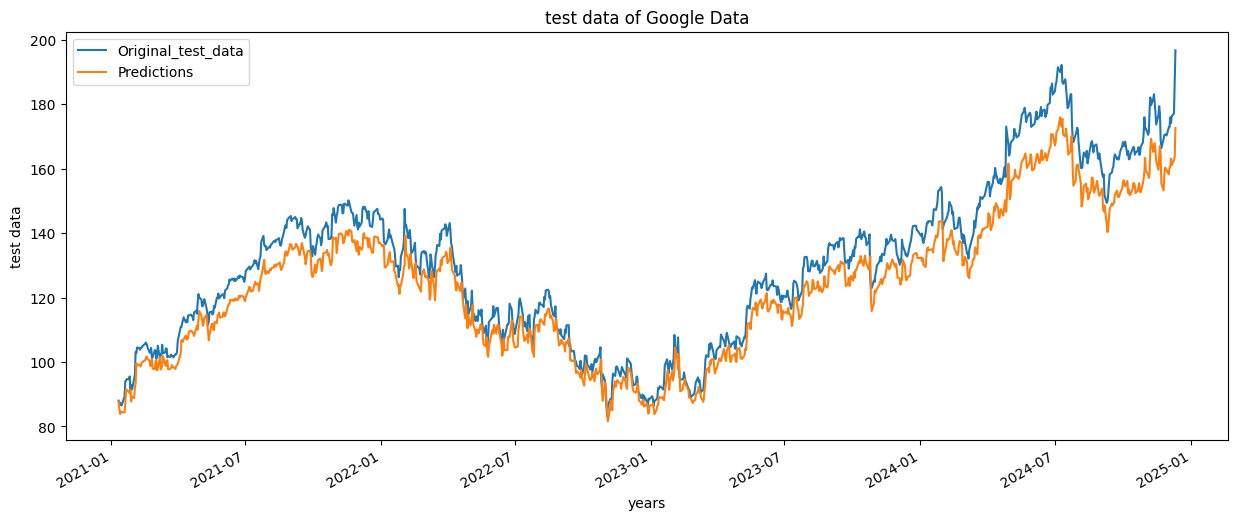

In [ ]:
plot_graph((15,6),plotting_data,'test data')

<Figure size 640x480 with 0 Axes>

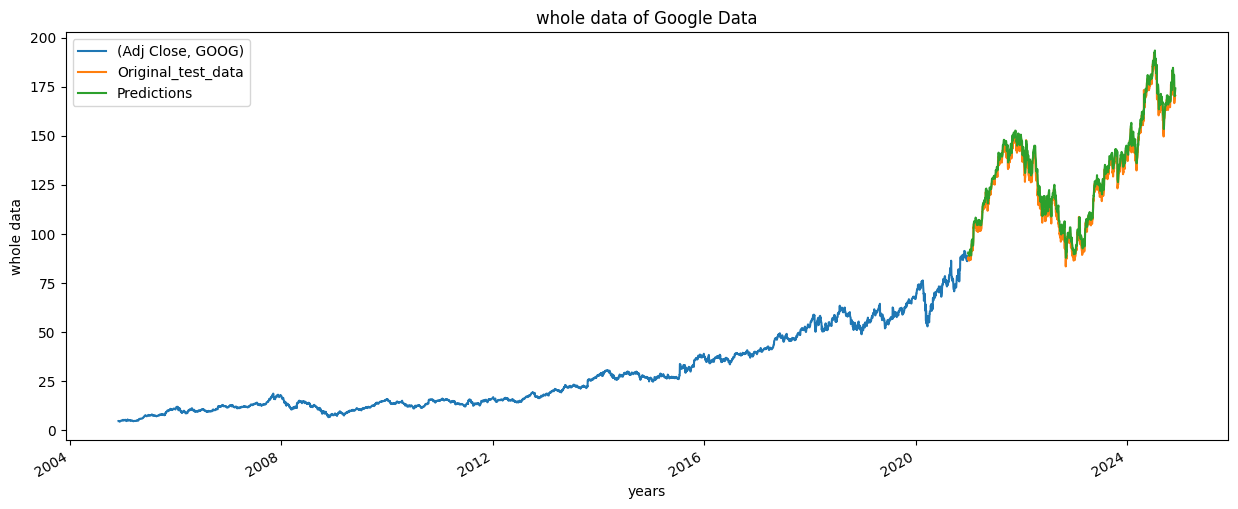

In [ ]:
plot_graph((15,6),pd.concat([Adj_close_price[:splitting_len+100],plotting_data],axis=0),'whole data')

In [ ]:
model.save('stock_price_predictor.keras')

In [ ]:
print(google_data.columns)


MultiIndex([(           'Adj Close', 'GOOG'),
            (               'Close', 'GOOG'),
            (                'High', 'GOOG'),
            (                 'Low', 'GOOG'),
            (                'Open', 'GOOG'),
            (              'Volume', 'GOOG'),
            (     'MA_for_250_days',     ''),
            (     'MA_for_100_days',     ''),
            (      'MA_for_50_days',     ''),
            ('percentage_change_cp',     '')],
           names=['Price', 'Ticker'])
